In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from shapely import wkt
import json

# TODO will we predict just the edifc_uso or also edifc_stat & edifc_ty?
# TODO get the dictionary w/ definitions for edifc_uso

In [9]:
# Load dataset
dataset = pd.read_csv("data/postgis_output/D45420917_0101_Punti.csv", dtype={'edifc_uso': object}) # TODO read whole dataset properly
dataset['points_geometry'] = dataset.points_geometry.apply(wkt.loads)

# Convert geometries into pixels (?) # TODO better description
dataset["points"] = [[(point.x, point.y, point.z) for point in multipoint.geoms] for multipoint in list(dataset["points_geometry"])]

with open("edifc_uso_general.json", "r") as f:
    edifc_uso_mapping = json.load(f)
dataset["edifc_uso_desc"] = dataset["edifc_uso"].map(edifc_uso_mapping)

In [149]:
from scipy.interpolate import LinearNDInterpolator
import requests
import math
import matplotlib.image as mpimg
from matplotlib import rcParams

def plot_points(x, y, z, ax):
        X = np.linspace(min(x), max(x), num=200)
        Y = np.linspace(min(y), max(y), num=200)
        X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation
        interp = LinearNDInterpolator(list(zip(x, y)), z)
        Z = interp(X, Y)
        ax.pcolormesh(X, Y, Z, shading='auto')
        ax.legend()
        ax.axis("equal")
        ax.plot(np.median(x), np.median(y), color='red', marker='o', markersize=20)

def show_satellite_image(x, y, ax, zoom = 19):
        # Mapbox access token
        access_token = 'pk.eyJ1IjoibWF0dGVvYmlnbGlvbGkiLCJhIjoiY2txcGN0cmJ5MDBqdTJvazV6cXdiM2ZqOSJ9.Bd6Gd05464fMSOpqCB-uTw'

        # Define the Mapbox API endpoint for creating a static map
        center_x = np.median(x)
        center_y = np.median(y)
        url = f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/pin-l+f41010({center_x},{center_y})/{center_x},{center_y},18.55,0/512x512@2x?access_token={access_token}"
        # Send the API request and get the image
        with open("satellite_image.jpeg", 'wb') as f:
                f.write(requests.get(url).content)

        satellite_image = mpimg.imread('satellite_image.jpeg', format="jpeg")
        ax.imshow(satellite_image)

def show_dataset_sample(points):
        x, y, z = map(np.array, zip(*points))
        
        fig, ax = plt.subplots(1, 2, figsize=(15, 8))

        plot_points(x, y, z, ax[0])
        show_satellite_image(x, y, ax[1])

        plt.draw()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


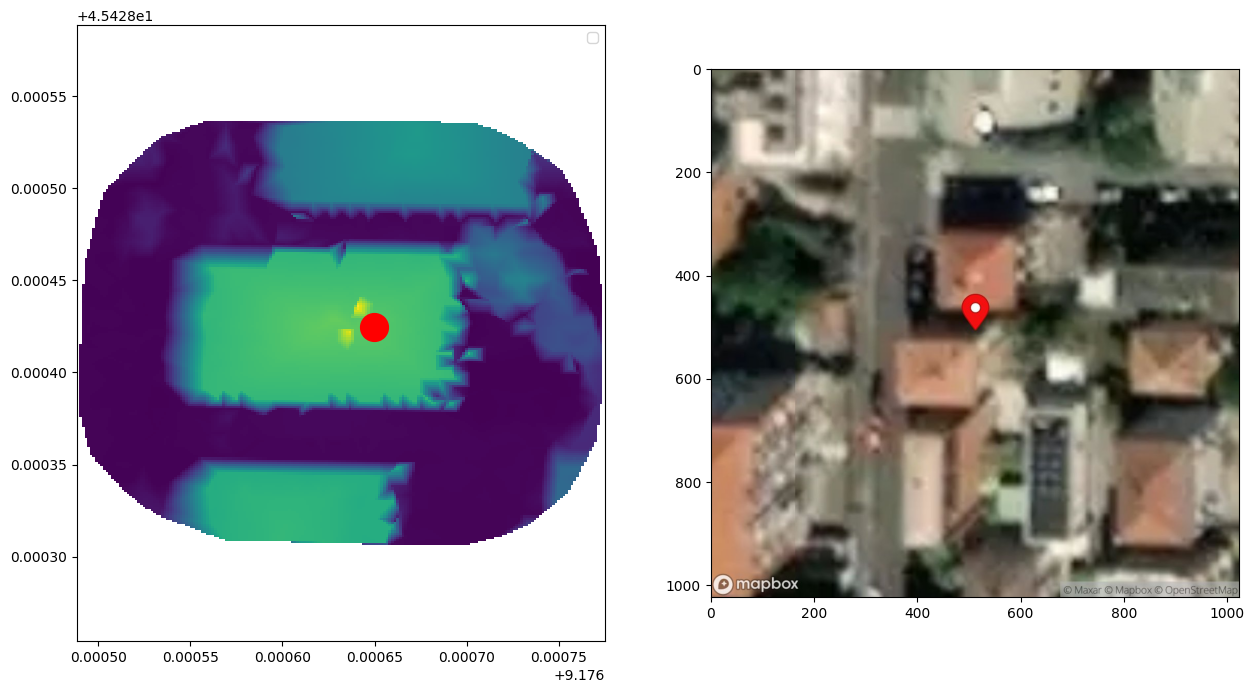

In [150]:
# Show dataset example
points = dataset.iloc[0,-1]
show_dataset_sample(points)

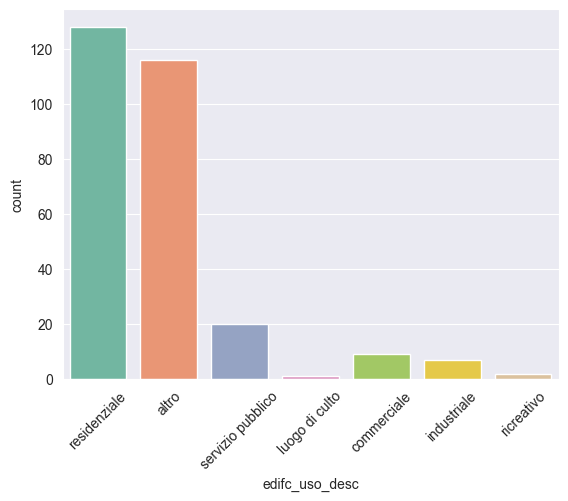

In [11]:
# Check if dataset is balanced
sn.set_style('darkgrid')
sn.countplot(x = "edifc_uso_desc", data = dataset, palette="Set2") 
plt.xticks(rotation=45)
plt.show()

In [8]:
dataset

,footprint_id,edifc_stat,edifc_ty,edifc_uso,footprint_geometry,points_id,points_geometry,points,edifc_uso_desc
0,140.0,3,1,1,MULTIPOLYGON(((9.176693648412613 45.4284568001...,"{864791,864789,864788,864787,864345,864344,864...","MULTIPOINT Z (9.17660816 45.42830809 164.04, 9...","[(9.17660816, 45.42830809, 164.04), (9.1765886...",NaN
1,627.0,2,95,95,MULTIPOLYGON(((9.176002664700748 45.4239530350...,"{514111,514112,527042,526668,527030,527034,526...","MULTIPOINT Z (9.17593296 45.42387206 149.81, 9...","[(9.17593296, 45.42387206, 149.81), (9.1759235...",NaN
2,688.0,2,95,95,MULTIPOLYGON(((9.17912867778949 45.42258177023...,"{1539753,1539754,1539755,1539756,1539757,15397...","MULTIPOINT Z (9.17915294 45.42260003 150.34, 9...","[(9.17915294, 45.42260003, 150.34), (9.1791618...",NaN
3,933.0,3,1,1,MULTIPOLYGON(((9.177087192685937 45.4281259348...,"{860205,860216,860227,860206,860217,860223,860...","MULTIPOINT Z (9.17689877 45.42823788 151.82, 9...","[(9.17689877, 45.42823788, 151.82), (9.177023,...",NaN
4,1096.0,3,1,1,MULTIPOLYGON(((9.176716354400089 45.4297242830...,"{966310,966309,966308,966307,966306,966305,966...","MULTIPOINT Z (9.17675969 45.42963374 152.82, 9...","[(9.17675969, 45.42963374, 152.82), (9.1767504...",NaN
...,...,...,...,...,...,...,...,...,...
278,73695.0,3,1,1,MULTIPOLYGON(((9.176628192831513 45.4224537813...,"{215287,215794,215286,215285,215795,215284,215...","MULTIPOINT Z (9.17663901 45.42258379 150.09, 9...","[(9.17663901, 45.42258379, 150.09), (9.1767548...",NaN
279,73849.0,3,1,1,MULTIPOLYGON(((9.176749806827988 45.4294497778...,"{955043,949481,954640,949485,955042,954639,949...","MULTIPOINT Z (9.17668915 45.42947723 163.56, 9...","[(9.17668915, 45.42947723, 163.56), (9.1766192...",NaN
280,74580.0,2,95,95,MULTIPOLYGON(((9.178503852576116 45.4291854001...,"{1662927,1662938,1663461,1662939,1663648,16629...","MULTIPOINT Z (9.1791967 45.42907754 169.3, 9.1...","[(9.1791967, 45.42907754, 169.3), (9.17911439,...",NaN
281,74594.0,3,1,1,MULTIPOLYGON(((9.17649998283213 45.42383957913...,"{506437,506436,506435,506453,506454,513534,506...","MULTIPOINT Z (9.17646842 45.42375034 150.13, 9...","[(9.17646842, 45.42375034, 150.13), (9.1764585...",NaN


In [4]:
# Dataset won't be balanced => make it balanced

In [5]:
# Extract features

In [6]:
# Classify w/ features

In [7]:
# Classify w/ CNN

In [ ]:
# Results and comparison